In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
path = os.getenv("get_data")
data = pd.read_csv(filepath_or_buffer=rf"{path}\La_Crime_Data\final_data.csv")
df = data.copy()
df.head()

,id,reported,occurred,time,area,code,code_info,age,sex,descent,descent_info,premises,weapon,weapon_info,status,location,latitude,longitude
0,190326475,01.03.2020,01.03.2020,21:30,Wilshire,VEHICLE - STOLEN,Property Crimes,28,M,O,"East Asia, Southeast Asia, Pacific Islands",STREET,NaN,Not Classified,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,09.02.2020,08.02.2020,18:00,Central,BURGLARY FROM VEHICLE,Property Crimes,47,M,O,"East Asia, Southeast Asia, Pacific Islands",BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Not Classified,Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11.11.2020,04.11.2020,17:00,Southwest,BIKE - STOLEN,Property Crimes,19,other,X,"Native Americans, isolated populations of Eurasia","MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Not Classified,Investigation Continued,1400 W 37TH ST,34.0210,-118.3002
3,200907217,10.05.2023,10.03.2020,20:37,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),Property Crimes,19,M,O,"East Asia, Southeast Asia, Pacific Islands",CLOTHING STORE,NaN,Not Classified,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,18.08.2022,17.08.2020,12:00,Hollywood,THEFT OF IDENTITY,Property Crimes,28,M,H,"Europe, particularly Western Europe",SIDEWALK,NaN,Not Classified,Investigation Continued,1900 TRANSIENT,34.0944,-118.3277


In [3]:
df.info(verbose=False);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974477 entries, 0 to 974476
Columns: 18 entries, id to longitude
dtypes: float64(2), int64(2), object(14)
memory usage: 133.8+ MB


## Exploratory Data Analysis

In [4]:
gender = df[df["sex"].isin(["M", "F"])]["sex"]

In [5]:
df["age"].groupby(by = gender).describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,count,mean,std,min,10%,25%,50%,75%,90%,max
sex,,,,,,,,,,
F,350930.0,38.611244,15.602569,2.0,22.0,27.0,35.0,48.0,61.0,99.0
M,394539.0,39.673345,15.166586,2.0,23.0,28.0,36.0,50.0,62.0,99.0


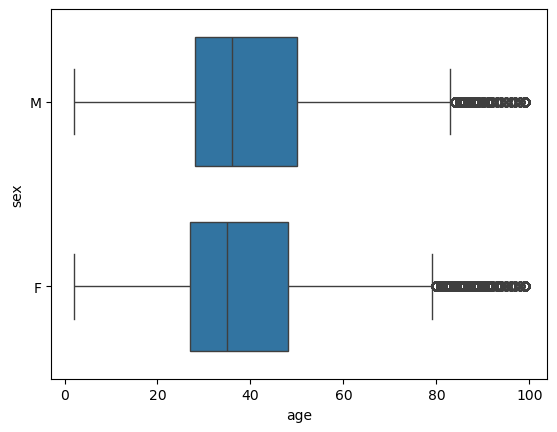

In [6]:
sns.boxplot(
    x = df["age"], 
    y = gender,
    orient= "h", 
    width= 0.7,
    linewidth= 1,
    legend = "full"
);

In [7]:
df_group = df.groupby(by = df["code_info"])[["age", "id", "sex"]].agg(
                                                    age_min = ("age", "min"),
                                                    age_mean = ("age", "mean"),
                                                    age_max = ("age", "max"),            
                                                    total_victim = ("id", "count")).sort_values(by = "total_victim", ascending = False)


df_group["dominant_sex"] = df.groupby(by = df["code_info"])["sex"].agg(lambda x: x.mode())
sex_count = df.groupby(by = df["code_info"])["sex"].value_counts().unstack()
df_group["dominant_sex_percentage"] = sex_count.max(axis = 1) / df_group["total_victim"] * 100
df_group

,age_min,age_mean,age_max,total_victim,dominant_sex,dominant_sex_percentage
code_info,,,,,,
Property Crimes,2,36.493816,99,606935,M,37.328709
Violent Crimes,2,36.723179,120,243941,M,49.767772
Weapons and Dangerous Substances Crimes,2,38.303877,99,39098,M,52.780193
Crimes Against Justice,2,41.750623,99,23274,F,69.493856
Other Crimes,2,32.182675,99,20260,F,44.225074
Sexual Crimes,2,31.827444,99,19217,F,73.049904
Crimes Against Public Order,2,36.554190,99,18712,other,39.947627
Crimes Against Family and Children,2,16.113053,99,2689,F,60.728896
Fraud and White-Collar Crimes,15,37.011396,97,351,M,43.589744


Property crimes are the most common type of crime, with the highest number of victims. The victims are typically middle-aged (36.49) and predominantly male (37.33%).
Violent crimes are notable for their more balanced gender distribution; most victims are middle-aged (36.72), with men making up the majority at 49.77%.
Crimes involving weapons and dangerous materials, as well as crimes against justice, primarily involve male victims, while categories like crimes against families and children, and sexual offenses, are dominated by female victims.
In crimes against public order, the proportion of victims with other gender identities is significant (39.95%), highlighting the diversity of crime victims in terms of gender identity.

Text(0, 0.5, 'Total Victim')

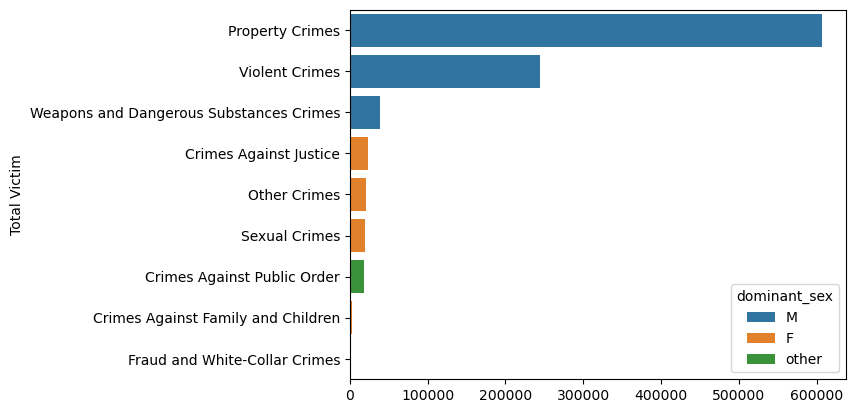

In [20]:
sns.barplot(y = df_group.index, x = df_group["total_victim"], hue = df_group["dominant_sex"], orient = "h")
plt.xticks(rotation=0, fontsize=10)
plt.xlabel("")
plt.ylabel("Total Victim", fontsize = 10)

In [9]:
df.head(2)

,id,reported,occurred,time,area,code,code_info,age,sex,descent,descent_info,premises,weapon,weapon_info,status,location,latitude,longitude
0,190326475,01.03.2020,01.03.2020,21:30,Wilshire,VEHICLE - STOLEN,Property Crimes,28,M,O,"East Asia, Southeast Asia, Pacific Islands",STREET,NaN,Not Classified,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,09.02.2020,08.02.2020,18:00,Central,BURGLARY FROM VEHICLE,Property Crimes,47,M,O,"East Asia, Southeast Asia, Pacific Islands",BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Not Classified,Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628


In [10]:
df2 = df.copy()

dates_occurred = [datetime.strptime(item, "%d.%m.%Y") for item in df["occurred"]]
dates_reported = [datetime.strptime(item, "%d.%m.%Y") for item in df["reported"]]

In [11]:
df2["occurred"] = dates_occurred
df2["reported"] = dates_reported

In [19]:
df2.head(2)

,id,reported,occurred,time,area,code,code_info,age,sex,descent,descent_info,premises,weapon,weapon_info,status,location,latitude,longitude
0,190326475,2020-03-01,2020-03-01,21:30,Wilshire,VEHICLE - STOLEN,Property Crimes,28,M,O,"East Asia, Southeast Asia, Pacific Islands",STREET,NaN,Not Classified,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,18:00,Central,BURGLARY FROM VEHICLE,Property Crimes,47,M,O,"East Asia, Southeast Asia, Pacific Islands",BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Not Classified,Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628


In [24]:
time_group = df2.groupby(by = [df2["occurred"].array.year, "sex"])[["id"]].agg(victim_counts = ("id", "count")).unstack()

In [212]:
time_group["sum_of_year"] = time_group.sum(axis=1);time_group

victim_counts               sum_of_year
sex              F      M  other            
2020         72682  84971  42116      399538
2021         77048  88100  44632      419560
2022         89565  95716  49835      470232
2023         82852  91660  57535      464094
2024         28783  34092  34890      195530

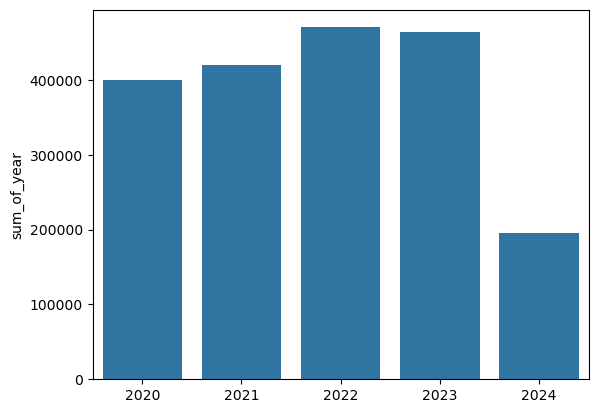

In [213]:
sns.barplot(data = time_group.sum_of_year);

In [43]:
df2.groupby(by = [df2["descent_info"], "descent"])[["sex", "age"]].agg(victim_counts = 
                                                          ("sex", "count"), 
                                                          avg_age = ("age", "mean"),
                                                          dominant_sex = ("sex", lambda x: x.mode())
                                                         ).sort_values(by = "victim_counts", ascending = False)

,,victim_counts,avg_age,dominant_sex
descent_info,descent,,,
"Europe, particularly Western Europe",H,291256,36.768530,F
"South Asia, Central Asia, some regions of Europe",W,195759,42.412543,M
"Asian and Native American, Pacific Islands, Polynesia",B,133656,39.314090,F
"Native Americans, isolated populations of Eurasia",X,101620,28.268609,other
"East Asia, Southeast Asia, Pacific Islands",O,76222,39.536354,M
Populations of African descent,A,20955,42.170461,M
"Europe, Middle East, India, Central Asia",K,5581,41.824404,M
"A wide region of Asia, various populations",F,4467,39.548467,M
"Asia, Australian Aborigines, Native Americans",C,4161,34.637827,M


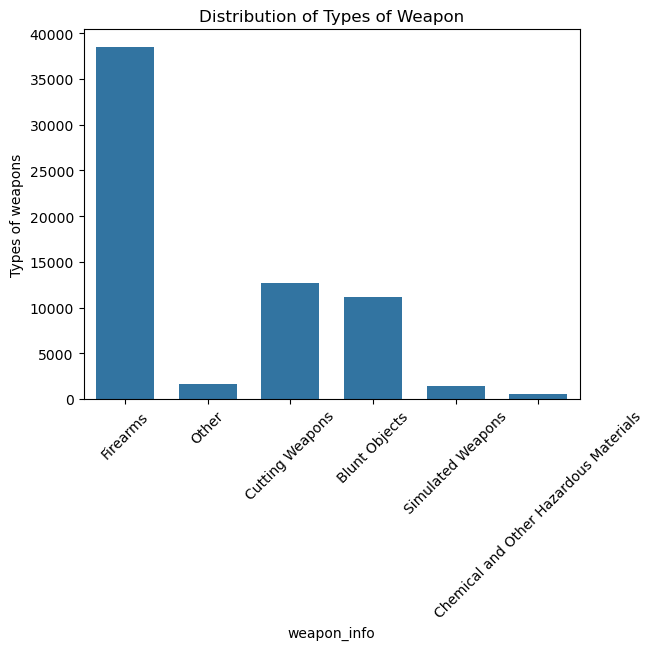

In [67]:
sns.countplot(data = df2[df2["weapon_info"] != "Not Classified"], x = "weapon_info", width=0.7, orient="h")
plt.title("Distribution of Types of Weapon")
plt.ylabel("Types of weapons")
plt.xticks(rotation = 45);

In [82]:
df2["age_group"] = pd.cut(df2["age"], bins=[0, 18, 30, 45, 60, 110], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

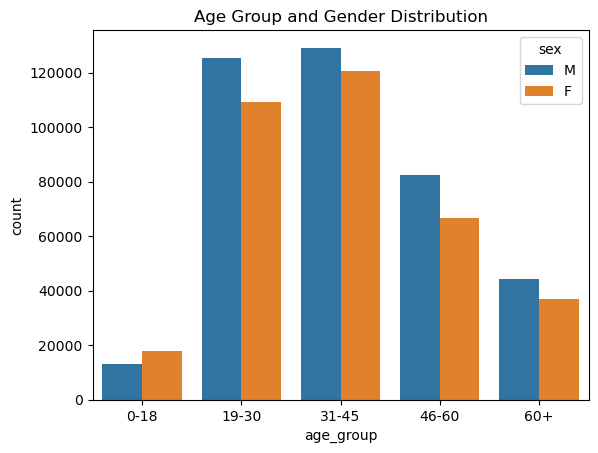

In [88]:
sns.countplot(data = df2[df2["sex"] != "other"], x = "age_group", hue = "sex")
plt.title("Age Group and Gender Distribution");

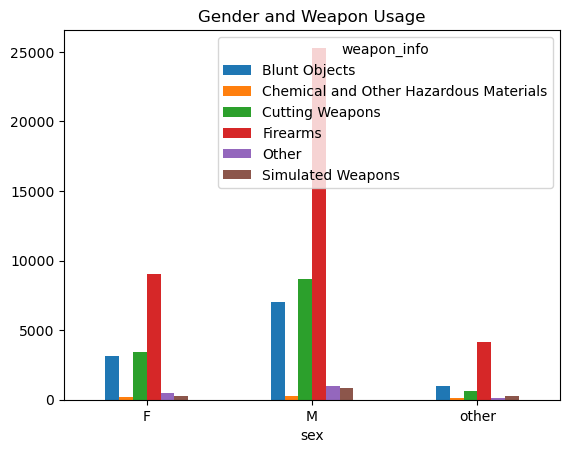

In [208]:
pd.crosstab(df2["sex"], df2[df2["weapon_info"] != "Not Classified"]["weapon_info"]).plot(kind='bar', stacked=False, legend = {"reverse"})
plt.title("Gender and Weapon Usage")
plt.xticks(rotation = 0)
plt.show()

In [113]:
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['00-04', '04-08', '08-12', '12-16', '16-20', '20-24']

In [130]:
df2["time"] = pd.to_datetime(df2["time"], format = "%H:%M")

In [ ]:
df2["hours"] = list(map(lambda x: x.hour, df2["time"]))

In [142]:
df2["hours_group"] = pd.cut(df2["hours"], bins = bins, labels = labels)

Crimes distribution by hours

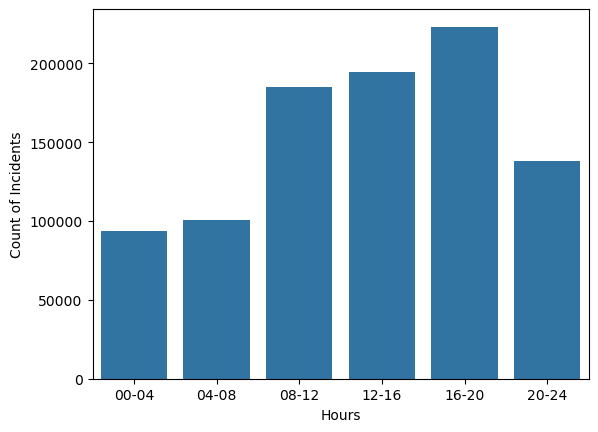

In [149]:
sns.countplot(data=df2, x = df2["hours_group"])
plt.xlabel("Hours")
plt.ylabel("Count of Incidents");

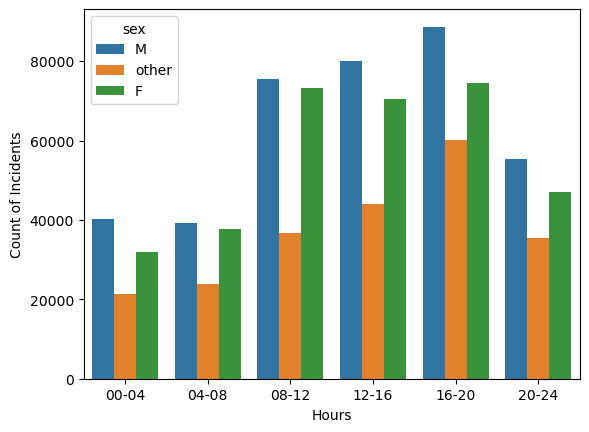

In [148]:
sns.countplot(data=df2, x = df2["hours_group"], hue = df2["sex"])
plt.xlabel("Hours")
plt.ylabel("Count of Incidents");

In [178]:
df2.groupby(by = [df2["status"], "sex"])[["id", "age"]].agg(status_count = ("id", "count")).unstack()

status_count                
sex                                F       M   other
status                                              
Adult Arrest                   34480   34999   15150
Adult Other                    57811   42041    7031
Investigation Continued       256657  315270  206018
Juvenile Arrest                 1099    1511     571
Juvenile Other                   881     715     236
Unknown                            2       3       2